In [16]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
np.random.seed(333)

In [18]:
random_1 = np.random.randn(2,100)

In [19]:
random_1.shape

(2, 100)

In [20]:
random_2 = np.random.randn(2,100) + 2

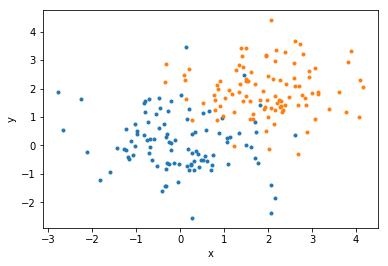

In [21]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');


## Figure 1. Two sets of random points
Two sets of random points for further clustering

## 1. chose the number of clusters
nclusters = 2

In [22]:
random_stack = np.hstack([random_1, random_2])

## 2. set a guess for the initial centers

In [23]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

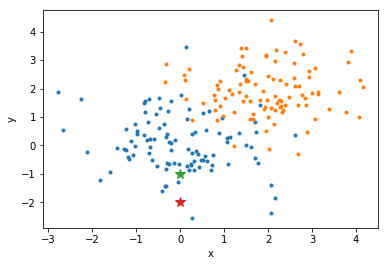

In [24]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

## Figure 2. Two random set of points with initial centers
The stars denotes their initial centers

In [25]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [26]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [27]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


In [28]:
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import display, clear_output
import time

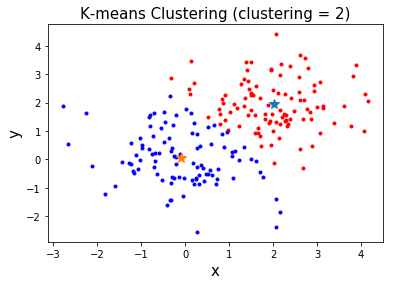

7
[[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


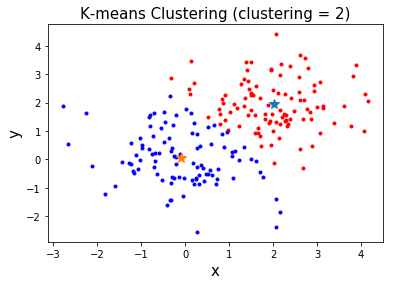

array([ 2.01522567,  1.93589473])

In [29]:
iterat = 0

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                      np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')
l3, = ax.plot(centers[0,0], centers[0,1], '*',ms = 10)
l4, = ax.plot(centers[1,0], centers[1,1], '*', ms = 10)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('K-means Clustering (clustering = 2)', fontsize=15)

display(fig)

while (not (centers == newc).all()) or iterat > 10:
    centers = newc
    
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                  np.hstack([random_1[:, cl1], random_2[:, cl2]])[1])
    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1])
    l3.set_data(centers[0,0], centers[0,1])
    l4.set_data(centers[1,0], centers[1,1])
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print(iterat)
    print (centers, newc)
    iterat += 1

plt.show()
newc[0]

## Figure 3. KMeans Clustering Animation 
This figure shows the process of the Kmeans clustering. The centers move after every iteration until a certain convergence. In this case, the convergence rule is set to when the centers of the previous iteration and the centers of the current iteration is the same or when it reaches 10 iterations.
This plot shows the result of the K-means clustering with two clusters.

Points: 10

Total: 10/10